In [43]:
import re
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from sklearn import decomposition
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
nltk.download('wordnet')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from collections import Counter

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Question  1A

In [2]:
# categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
# categories=categories,\
#training dataset 
remove = ('headers', 'footers', 'quotes')
docs = fetch_20newsgroups(subset='train',  remove=remove)
docs_df = pd.DataFrame(docs.data, columns=["text"])
docs_df['topic'] = pd.Series(data=docs.target, index=docs_df.index)

#test dataset 
remove = ('headers', 'footers', 'quotes')
docstest = fetch_20newsgroups(subset='test',  remove=remove)
docs_dftest = pd.DataFrame(docstest.data, columns=["text"])
docs_dftest['topic'] = pd.Series(data=docstest.target, index=docs_dftest.index)


,text,topic
0,I am a little confused on all of the models of...,7
1,I'm not familiar at all with the format of the...,5
2,"\nIn a word, yes.\n",0
3,\nThey were attacking the Iraqis to drive them...,17
4,\nI've just spent two solid months arguing tha...,19
...,...,...
7527,"\n Henry, if I read you correctly, you may b...",14
7528,"about\nthem on\n\nActually, I thought Macs wer...",4
7529,"I sent a version of this post out a while ago,...",9
7530,I have this kit which includes the following :...,6


In [111]:
stop_words = stopwords.words('english')

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

PUNCTUATION = '[^\w\s]' #^=not, \w=alphanumeric character, \s=space

docs_df['text'] = docs_df['text'].str.lower()
docs_df['text'] = docs_df['text'].apply(lambda x: ' '.join([item for item in x.split() if item.strip() not in stop_words]))
docs_df['text'] = docs_df['text'].apply(lambda x: lemmatizer.lemmatize(x))
docs_df['text'] = docs_df['text'].apply(lambda x: stemmer.stem(x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub(PUNCTUATION, '', x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub('\n', ' ', x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub('[\d-]', ' ', x))
docs_df['text'] = docs_df['text'].apply(lambda x: re.sub('_',' ', x))


docs_dftest['text'] = docs_dftest['text'].str.lower()
docs_dftest['text'] = docs_dftest['text'].apply(lambda x: ' '.join([item for item in x.split() if item.strip() not in stop_words]))
docs_dftest['text'] = docs_dftest['text'].apply(lambda x: lemmatizer.lemmatize(x))
docs_dftest['text'] = docs_dftest['text'].apply(lambda x: stemmer.stem(x))
docs_dftest['text'] = docs_dftest['text'].apply(lambda x: re.sub(PUNCTUATION, '', x))
docs_dftest['text'] = docs_dftest['text'].apply(lambda x: re.sub('\n', ' ', x))
docs_dftest['text'] = docs_dftest['text'].apply(lambda x: re.sub('[\d-]', ' ', x))
docs_dftest['text'] = docs_dftest['text'].apply(lambda x: re.sub('_',' ', x))
docs_dftest['text'] = docs_dftest['text'].apply(lambda x: ' '.join([item for item in x.split() if item.strip() not in stop_words]))



# Question  1B i

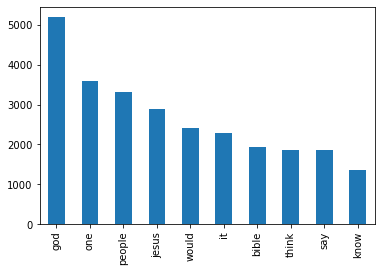

In [13]:
for x in range(20):
    commondf = docs_df.loc[(docs_df['topic'] == x)]
    common = ' '.join(commondf['text'])
    common = pd.Series(common.split()).value_counts()[:10]
#     commondft = pd.DataFrame(common)
#     commondft.rename( columns={0 :'count'}, inplace=True )
    common.plot(kind="bar")
    #plt.plot(commondft['count'], color='blue', marker='o')
    a = 'plot' + str(x)   
    plt.savefig(a)
    

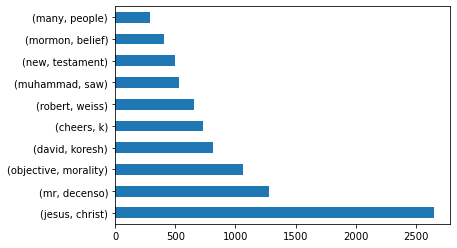

In [5]:
for x in range(20):
    bigramdf = docs_df.loc[(docs_df['topic'] == x)]
    words = ' '.join([i for i in bigramdf['text']]).split()
    bigrams = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]
    bigrams.plot(kind = "barh")
    a = 'bigram' + str(x)
    plt.savefig(a)

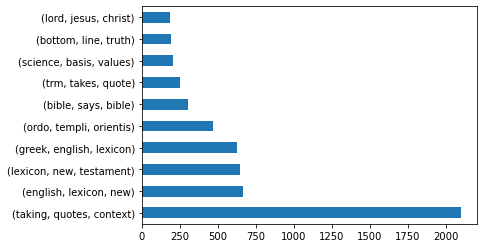

In [6]:
for x in range(20):
    trigramdf = docs_df.loc[(docs_df['topic'] == x)]
    words = ' '.join([i for i in trigramdf['text']]).split()
    bigrams = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]
    bigrams.plot(kind = "barh")
    a = 'trigram' + str(x)
    plt.savefig(a)

# Question  1B ii

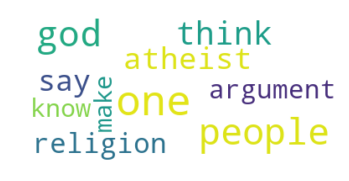

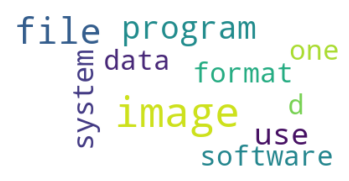

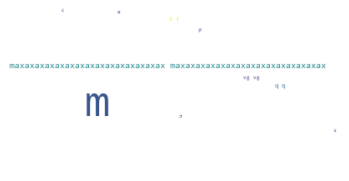

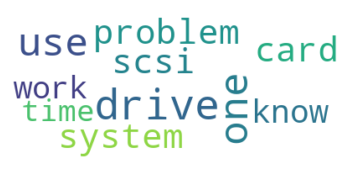

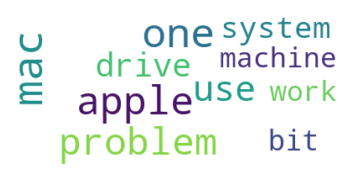

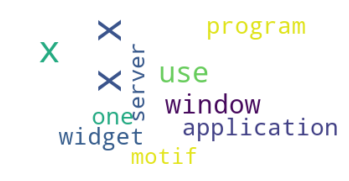

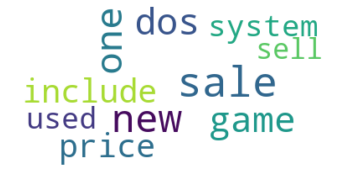

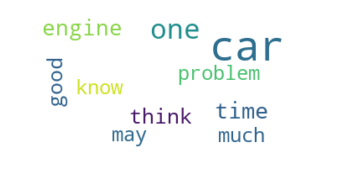

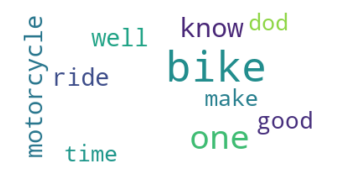

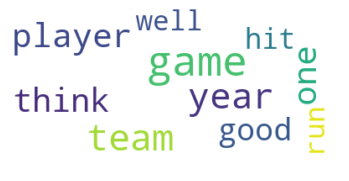

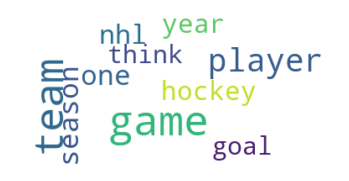

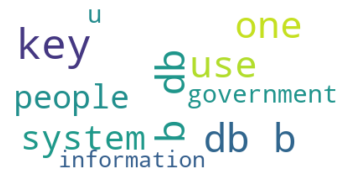

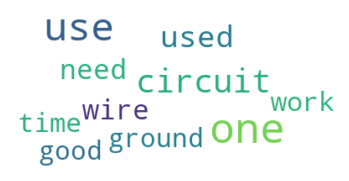

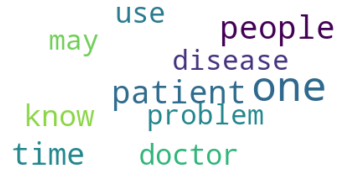

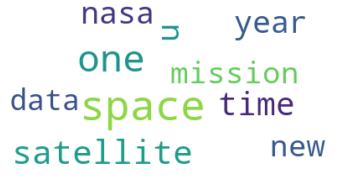

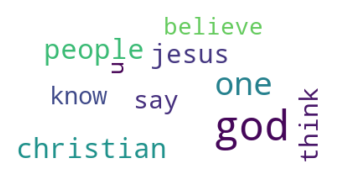

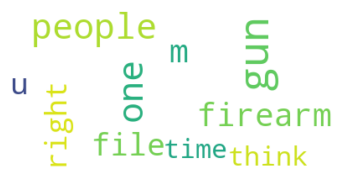

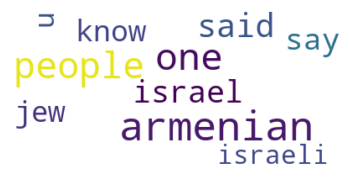

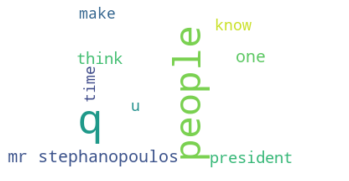

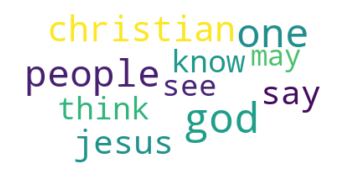

In [7]:
for x in range(20):
    commondf = docs_df.loc[(docs_df['topic'] == x)]
    text = ' '.join(commondf['text'])
    wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    a = 'wordcloud' + str(x)
    plt.savefig(a)

# Question  1B iii

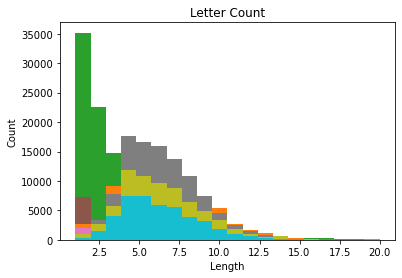

In [11]:
#letter count
for x in range(20):
    commondf = docs_df.loc[(docs_df['topic'] == x)]
    words = ' '.join([i for i in commondf['text']]).split()
    mylist = []
    for i in words:
        mylist.append(len(i))   
    plt.title("Letter Count")
    plt.xlabel("Length")
    plt.ylabel("Count")      
    plt.hist(mylist, bins=20, range=[1, 20])
    a = 'lettercount' + str(x)
    plt.savefig(a)



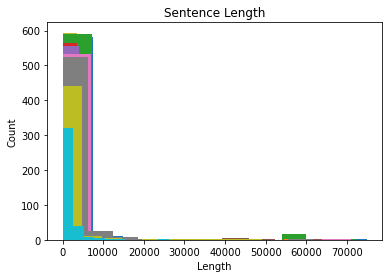

In [81]:
#SENTENCE LENGTH 
docs_df['len'] = docs_df['text'].apply(len)
docs_df

for x in range(20):
    commondf = docs_df.loc[(docs_df['topic'] == x)]
    plt.title("Sentence Length")
    plt.xlabel("Length")
    plt.ylabel("Count")
    plt.hist(commondf['len'])
    a = 'SentenceLength' + str(x)
    plt.savefig(a)
    

# Question 1C

In [151]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

v = TfidfVectorizer()
train = v.fit_transform(docs_df['text'])
test = v.fit_transform(docs_dftest['text'])

df_tfidf = pd.DataFrame(train.todense())

lda_model=LatentDirichletAllocation(n_components=20, random_state=42) 
lda_top=lda_model.fit_transform(train.todense())

svd_model = TruncatedSVD(n_components=20, random_state=42)
svd_top = svd_model.fit_transform(train.todense())

In [152]:
vocab = v.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ", end = " ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0:  experiential cultur leave tilde jbxg scientist budgets bath bostons advertized 

Topic 1:  rife fatima malybeili incarn residents urbana ceaseanddesist nsa fh policyimportant 

Topic 2:  traction wayqubacuk pgm snailmail yct duh ynqs doublechecked maximumcurrent leds 

Topic 3:  depopulated tides adsorbed aref proves disassembling dealersevil depts maker nordiques 

Topic 4:  amplifier mattress lehzp fileserverbobsboxrentcom xtp wirebound hlsh subscrib admissable disagreed 

Topic 5:  zangezour blackjack bnxdd aflyin dontslander eds blurry degrades crawled championship 

Topic 6:  vca pioneer publishing kvkza wsb murderes assassins dramatically anotheno ley 

Topic 7:  qmsvt casady efkvxexhr hyatt garth impeller deuterocanon olavnordicoffshoreno diffent sawy 

Topic 8:  exporting mgr phc macgrawhill oval publishes nnrvm inspir winningham masteringdma 

Topic 9:  gchog nht oceanic zqjgjgqqwbj rattout circumcision workable respecets lamentation admirable 

Topic 10:  forrnula j

In [153]:
vocab = v.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("topic " + str(i)+": ", end = " ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

topic 0:  vca publishing pioneer wsb kvkza murderes dramatically anotheno ley assassins 

topic 1:  consequence garvas halvtid ydg assassins robshaw fullgrown inspire foa spira 

topic 2:  lehzp ooq cadtp cursing illusions buggi curv curricular lenght ydg 

topic 3:  peipaessexacuk ctjgbpxcqllnl hasnt debugger librarieswinsock pennzoil inspire premisserna amplifier hinduism 

topic 4:  garvas robshaw foa mpajb gastroenterologist dmitriev mallocarraymax consequence collins irdhye 

topic 5:  koreanmade crooked panamas nitrate lhp booing reassuring cbss sandels wirebound 

topic 6:  inspire fullgrown instantaneous gassanov gasimov remake atrocious khmylevs scan standardit 

topic 7:  lehzp peipaessexacuk khmylevs ctjgbpxcqllnl khorosrequestchamaeeceunmedu ooq pennzoil hasnt yasj debugger 

topic 8:  consequence pioneer spira murderes ctjgbpxcqllnl assassins gassanov publishing peipaessexacuk capsular 

topic 9:  consequence halvtid ydg azx spira nyfx tongu wsb librarieswinsock gassanov 


# Question 1E
# LSA

In [176]:
svd_topics_train = svd_model.transform(train)
svd_topics_train = svd_topics_train.argmax(axis=1)

svd_to_topic_lable = {}

pair_counter = Counter(list(zip(svd_topics_train, docs_df["topic"].to_numpy()))).most_common()

for pair, freq in pair_counter:
    k, v = pair
    k, v = int(k), int(v)
    if k in list(svd_to_topic_lable.keys()):
        continue
    svd_to_topic_lable[k] = v

svd_topics_train_prediction = list(map(lambda x:svd_to_topic_lable.get(x), svd_topics_train))


In [177]:
print("The accuracy score of lsa is: ",accuracy_score(docs_df["topic"].to_numpy(), svd_topics_train_prediction))
print("The f1 score of lsa is: ", f1_score(docs_df["topic"].to_numpy(), svd_topics_train_prediction, average='micro'))

The accuracy score of lsa is:  0.16545872370514406
The f1 score of lsa is:  0.16545872370514406


# LDA

In [175]:
#https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/
lda_to_topic_lable = {}

lda_topics_train = lda_model.transform(train)
lda_topics_train = lda_topics_train.argmax(axis=1)

pair_counter = Counter(list(zip(lda_topics_train, docs_df["topic"].to_numpy()))).most_common()

for pair, freq in pair_counter:
    k, v = pair
    k = int(k)
    v = int(v)
    if k in list(lda_to_topic_lable.keys()):
        continue
    lda_to_topic_lable[k] = v

lda_topics_train_prediction = list(map(lda_to_topic_lable.get, lda_topics_train))

print("The accuracy score score of lda is: ",accuracy_score(docs_df["topic"].to_numpy(), lda_topics_train_prediction))
print("The f1 score score of lda is: ",f1_score(docs_df["topic"].to_numpy(), lda_topics_train_prediction, average='micro'))

The accuracy score score of lda is:  0.06779211596252431
The f1 score score of lda is:  0.06779211596252431


# Question 1F